# Kod skelett, struktur, val av features och EDA

## Kod skelett

**Lite korta tanker**

En .py med bara hur data settet ska hanteras och struktureras. En data wrangler som bara plockar fram det vi är interserade av och begränsar data till en hanterbar storlek.

En .py där vi kör modellen och tränar den.

En .py där vi intergrarerar med modellen och plockar fram informationen från en färdig körd modell. 

## Struktur och val av features

### Outline

**Övergripande** Tanken är att bygga en data bas med alla info om varje filma som en punkt att gemföra emot den in mattade filmen. Så varje film blir en profil med det som behövs för att kunna hitta likheter för filmen som matats in i dom tre filtrerings stegen. Allt ska var automatiskt och bara spotta ut ett svar i slutet.  

**Data Wrangler** - Tänker att vi gör ett medelvärde på ranking för varje film, mer än att hålla kol på alla röstningar och skalan. Den bör var i någon form av skalering eller normalisering, för att ge ett mer objektivt värde. Lägga till en column med medlet. 

Sedan bör gener kolumnen göras om till ett set. För att gör filtrering enklare i den kolumnen mot input filmen.  Standardized rating direct i datasetet så det är färdigt att kör, tänk på bara om jag behöver ratings senare i modellen.

*Komponenter*
- Ladda data - Kan behövas flera sätt att ladda olika data set till modellen. 
- Lägga ihop set med varandra med den datan som behövs. Som tags, tids data, ranking data, movieid, namn och bag of words 
- Förädla - Sandardisera eller nomarlisera. Två metoder för detta. Kommer behövas flera kolumner med olika behandlade värden. 
- Bag of words för geners för att förenkla för modellen att hitta i första gallring, läggg till det som en column för gener istället.
- Tf-idf vector för tags and geners. Behöver en kolumn med både gener och tags i den.    
- Beräkning/Agrregering av tids data för att ge ett möjligt värde för hur nyligen den var engagerad.
    * Medel på tiden som det varit engegemang i filmen
    * Senast det var någon post
    * Dom senaste 6 månderna eller året
    * Spannet från första till sista post
    * Engagmnet är ett värde på när senaste postades något och vart medlet ligger långt från släpp datum. 

- Beräkning/Aggregering av ranking data för att ge ett standardizerat värde på ranking
    * Lägga till alla typer av ranking värde 0.5 till 5.0 och antelet för varje ranking.
    * En stadrizerad värde för medlet på av alla raningar. 

**Mata in** - Beroende på tid. Hur avancerat detta ska vara. Om den bara ska plocka från en lista till ett inteface. Kanske bara kanappar in i consolen. Börja med modellerna och data settet. Så får vi se vad tid finns till detta. 

**Kanditat genrator** Frågan om en film matas in. Det plockas fram 20 **Kan det var vär att skicka 30-80 filmer som kanditater, kanske behövs testing för det** filmer från en kanditats generator. Den ska var enkel och väldigt generell. Den plockar bara på gener. Är bara som ett första steg att hitta filmer som kan vara intressanta. Ranking datan kommer vara standardizerad. **Kan det vara värt att göra en KMeans klustering kring tio filmer sedan välja en från varje kluster så vi får 20 stycken. Tanken här är att utvidga bredden på filmerna som rekomanderas. För vill gå bort från att låta ranking var det viktiga utan bara väga in. 

**Ranking** Här tar ska kandidaterna bli 10 stycken. Detta gör vi genom att kolla på tags och gener genom en tf-idf vector. Och tar dom med mest likhets ranking. Tf-idf eller embbeding och kör model mot dom vectorerna för förutse vilken filmer som passar best. SVD är en model vi kan använda här

**Andra överväganden** Logistic Regression or Decision Trees bygga på classfierings model som lägger fram förslag för 5 stycken med rätt engagemang. Där vi använder input filem som profila att köra emot och ha som klassifirad data. 

Feature	Description
- days_since_release - Days from movie release to mean timestamp
- days_since_last_rating - How recently the movie was engaged with
- engagement_density - Ratings per year since release (activity rate)
- recent_tag_count - Tags added in last 6/12 months
- mean_rating_time - Average time when ratings happened
- std_rating_time	- Spread/consistency of rating timestamps

Target:
- Labels: High, medium, low
- funder kring targets här, vad ska gränsvärdena vara?.

Model:
- Logistic Regression
- Decision Tree / Random Forest
- SVM
Kanske Får köra en gridsearch på dem och se vilken som passar bäst. 

**Tänk på** Hur fördelning ser ut bland filmerna mellan olika frågetställningar. Tillexempel om data setet jag valt ut har en jämn representering av varje film. Så kanske det blir svårt att titta på vad många som tagat filmen eller rankat. *Tänk* på bias! 

**Mata ut** Hänger på hur avancerat jag vill göra det. Hur får vi detta funka utan tunga data sets och bara kör mot modeller. Hur tänker vi kring deploy. Kanske bästa straten är en .ipynb fil med svar från modellen.  

**REDME** Plita på readme när jag gjort något i koden och se till att det fylls i vad modellen gör. 

In [1]:
# Koden för EDA. Gör några funktioner som visar vad jag behöver för att undersöka data settet. 
# Några funktioner eller bara varibaler som vi kan kalla på i EDA och skriva lite om vad för slutatsat och val vi tar. 
# Bra början på en raport och komentarer till olika val vi gjort. 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [2]:
import os
print(os.getcwd())

f:\AI-24-programering\Python-programing-Hannes-Fredriksson\Maskininlärning\Labb\Laboration_2_Film_Recommender\EDA_Anteckningar_Test


In [3]:
rating_data = pd.read_csv("../Data/ratings.csv")
movies_data = pd.read_csv("../Data/movies.csv")
tags_data = pd.read_csv("../Data/tags.csv")

## EDA 



In [4]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_data["genres"].iloc[:15]

0     Adventure|Animation|Children|Comedy|Fantasy
1                      Adventure|Children|Fantasy
2                                  Comedy|Romance
3                            Comedy|Drama|Romance
4                                          Comedy
5                           Action|Crime|Thriller
6                                  Comedy|Romance
7                              Adventure|Children
8                                          Action
9                       Action|Adventure|Thriller
10                           Comedy|Drama|Romance
11                                  Comedy|Horror
12                   Adventure|Animation|Children
13                                          Drama
14                       Action|Adventure|Romance
Name: genres, dtype: object

In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [7]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [8]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [9]:
tags_data.head(15)

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
5,14,58559,Atmospheric,1311530439
6,14,58559,Batman,1311530391
7,14,58559,comic book,1311530398
8,14,58559,dark,1311530428
9,14,58559,Heath Ledger,1311530404


In [10]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328315 entries, 0 to 2328314
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 71.1+ MB


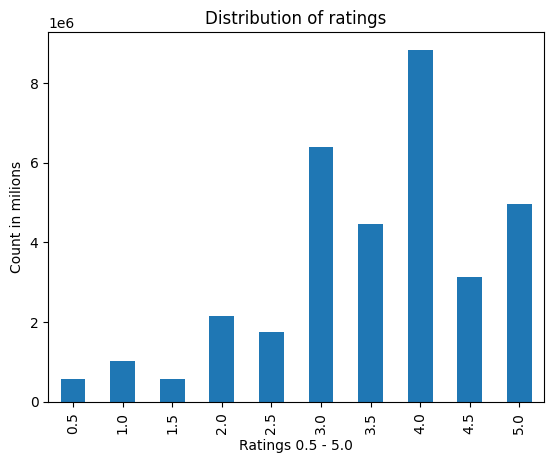

In [11]:
rating_data["rating"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Ratings 0.5 - 5.0")
plt.ylabel("Count in milions")
plt.title("Distribution of ratings")
plt.show();

In [12]:
len(rating_data["userId"].unique())

330975

In [13]:
len(tags_data["userId"].unique())

25280

In [14]:
rating_list = rating_data["movieId"].value_counts()

bottom_ratings = rating_list[(rating_list.values <= 500) & (rating_list.values >= 0)]
rating_list

movieId
318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
261715         1
257463         1
256693         1
161766         1
269782         1
Name: count, Length: 83239, dtype: int64

In [15]:
bottom_ratings

movieId
128975    500
4325      500
8796      500
324       500
6249      500
         ... 
261715      1
257463      1
256693      1
161766      1
269782      1
Name: count, Length: 76932, dtype: int64

In [16]:
movies_data.loc[movies_data["movieId"] == 128975]

,movieId,title,genres
27479,128975,Hot Tub Time Machine 2 (2015),Comedy|Sci-Fi


In [17]:
distribution_dict = {}
prev_r = 0 
for r in range(100, 2001, 100):
    label = f"{prev_r}-{r}"
    count = len(rating_list[(rating_list.values > prev_r) & (rating_list.values <= r)])
    distribution_dict[label] = count
    prev_r = r

label = "2000+"
count = len(rating_list[rating_list.values > 2000])
distribution_dict[label] = count


len(distribution_dict.keys())

21

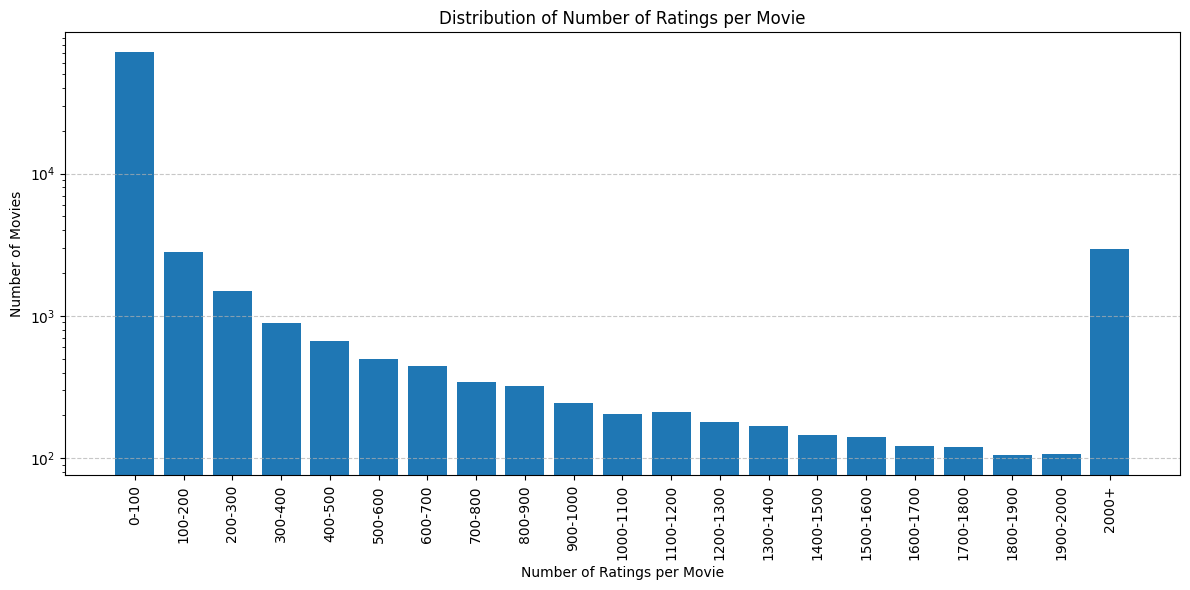

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(distribution_dict.keys(), distribution_dict.values())
plt.yscale("log")
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Number of Movies")
plt.title("Distribution of Number of Ratings per Movie")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
